# Live Coding 10/4/24 -- Pandas 



In [2]:
# standard imports

import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting
import pandas as pd               # Data input and manipulation


### Student Questions

### 1.  It would be good to understand the differences between merge , join , concat and when to use which one.


**Short Answer:** These are all ways of combining two or more DataFrames to bring all the relevant information into one DataFrame. They are useful when compiling your data set from diverse sources. 


Here is a nice summary from the Pandas documentation:

https://pandas.pydata.org/docs/user_guide/merging.html

## Concat

This is the simplest one, and is really the same as `np.concatenate([...])`


### Numpy concatenate

In [3]:
# In Numpy

# Creating two NumPy arrays
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[5, 6], [7, 8]])

print("\nArray 1:\n", array1)
print("\nArray 2:\n", array2)


Array 1:
 [[1 2]
 [3 4]]

Array 2:
 [[5 6]
 [7 8]]


In [4]:
# Concatenate along rows (axis=0)
result_vertical = np.concatenate((array1, array2), axis=0)

print("\nVertical Concatenation (axis=0):\n", result_vertical)


Vertical Concatenation (axis=0):
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [5]:
# # Concatenate along columns (axis=1)
# result_horizontal = np.concatenate((array1, array2), axis=1)

# print("\nHorizontal Concatenation (axis=1):\n", result_horizontal)

## Concat

In Pandas, `concat()` is used to combine DataFrames or Series along rows or columns. It is similar to np.concatenate() but designed specifically for DataFrames, with additional functionality for handling indices and different columns.


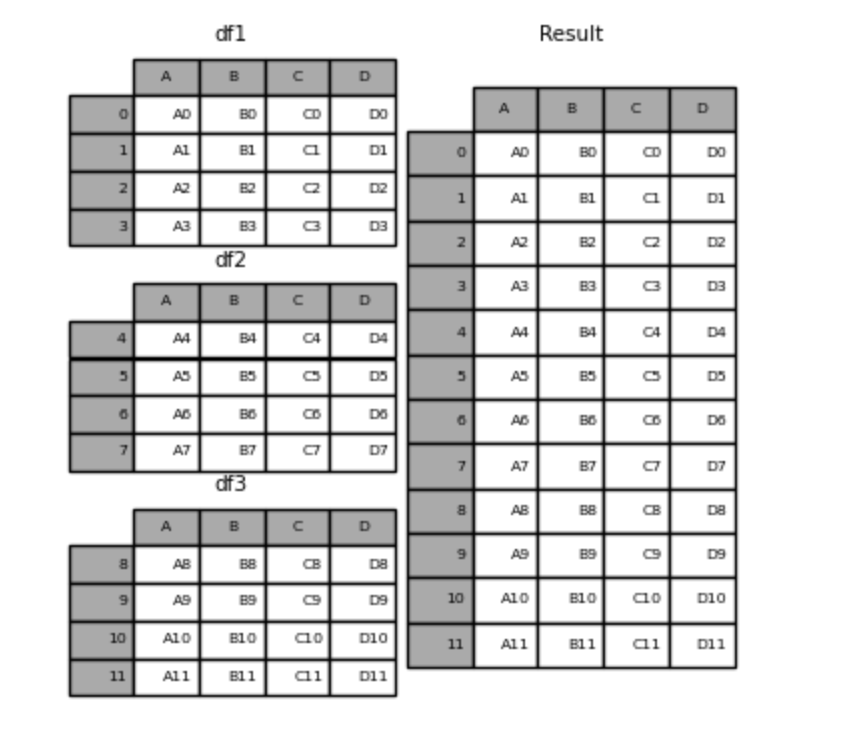


### The most common use case for concat is to aggregate data with same features/columns from separate files into one dataframe

**Example:** Suppose you have sales for each quarter, loaded as separate DataFrames, and you want to create an annual DataFrame.

In [7]:
df_q1 = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar'], 'Sales': [200, 250, 300]})
df_q2 = pd.DataFrame({'Month': ['Apr', 'May', 'Jun'], 'Sales': [310, 400, 350]})
df_q3 = pd.DataFrame({'Month': ['Jul', 'Aug', 'Sep'], 'Sales': [240, 240, 310]})
df_q4 = pd.DataFrame({'Month': ['Oct', 'Nov', 'Dec'], 'Sales': [210, 410, 480]})

# Write each quarterly DataFrame to a CSV file
df_q1.to_csv('quarter_1.csv', index=False)
df_q2.to_csv('quarter_2.csv', index=False)
df_q3.to_csv('quarter_3.csv', index=False)
df_q4.to_csv('quarter_4.csv', index=False)

dfs = [pd.read_csv(f'quarter_{i}.csv') for i in range(1, 5)]

for df in dfs:
    print(df,'\n')
    
annual_data = pd.concat(dfs, ignore_index=True)          # concat takes a list of data frames

print(annual_data)

  Month  Sales
0   Jan    200
1   Feb    250
2   Mar    300 

  Month  Sales
0   Apr    310
1   May    400
2   Jun    350 

  Month  Sales
0   Jul    240
1   Aug    240
2   Sep    310 

  Month  Sales
0   Oct    210
1   Nov    410
2   Dec    480 

   Month  Sales
0    Jan    200
1    Feb    250
2    Mar    300
3    Apr    310
4    May    400
5    Jun    350
6    Jul    240
7    Aug    240
8    Sep    310
9    Oct    210
10   Nov    410
11   Dec    480


## Join

Combines two DataFrames **horizontally** based on their indices. 


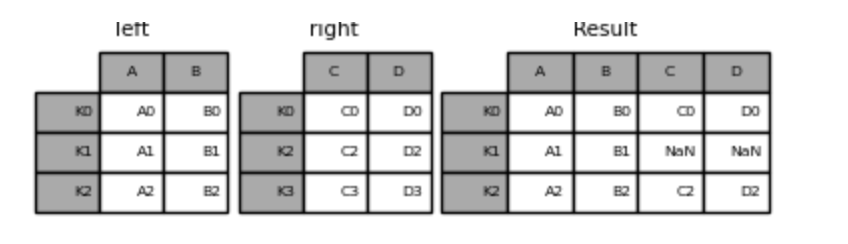

This would consolidate two datasets with the same individuals, but different features; you could
for example, add a feature to your dataset. 

In [73]:
df1 = pd.DataFrame({'name': ['Wayne','Jef','Will','David','Parita']})
df2 = pd.DataFrame({'Email': ['waysnyder@gmail.com','jconsidi@bu.edu','wmackin@bu.edu','dk98@bu.edu', 'pdanole@bu.edu']})

result = df1.join(df2, how='inner')  # Joins on index
print(df1,'\n')
print(df2,'\n')
print(result,'\n')

     name
0   Wayne
1     Jef
2    Will
3   David
4  Parita 

                 Email
0  waysnyder@gmail.com
1      jconsidi@bu.edu
2       wmackin@bu.edu
3          dk98@bu.edu
4       pdanole@bu.edu 

     name                Email
0   Wayne  waysnyder@gmail.com
1     Jef      jconsidi@bu.edu
2    Will       wmackin@bu.edu
3   David          dk98@bu.edu
4  Parita       pdanole@bu.edu 



The index can be an arbitrary index value. 

In [9]:
df1 = pd.DataFrame({'name': ['Wayne','Jef','Will','David','Parita']},
                    index = [111,325,114,154,121]                    )                   
df2 = pd.DataFrame({'Email': ['waysnyder@gmail.com','jconsidi@bu.edu','wmackin@bu.edu','dk98@bu.edu', 'pdanole@bu.edu']},
                    index = [132,325,114,154,121] 
                  )  
result = df1.join(df2, how='inner')  # Joins on index

print(df1,'\n')
print(df2,'\n')
print(result,'\n')

       name
111   Wayne
325     Jef
114    Will
154   David
121  Parita 

                   Email
132  waysnyder@gmail.com
325      jconsidi@bu.edu
114       wmackin@bu.edu
154          dk98@bu.edu
121       pdanole@bu.edu 

       name            Email
325     Jef  jconsidi@bu.edu
114    Will   wmackin@bu.edu
154   David      dk98@bu.edu
121  Parita   pdanole@bu.edu 



You can also join based on the index in one data frame with an arbitrary column in another, using the parameter `on`. 

In [22]:

# Left DataFrame with employees and DepartmentID as a column
df_left = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'DeptID': [10, 20, 10]
})

# Right DataFrame with DepartmentID as an index
df_right = pd.DataFrame({
    'Dept': ['HR', 'Engineering', 'Marketing']
}, index=[10, 20, 30])

print(df_left,'\n')
print(df_right,'\n')

# Using join with the on parameter to join index in df_right on the 'DeptID' column in df_left
result = df_left.join(df_right, on='DeptID')

print(result)


   ID     Name  DeptID
0   1    Alice      10
1   2      Bob      20
2   3  Charlie      10 

           Dept
10           HR
20  Engineering
30    Marketing 

   ID     Name  DeptID         Dept
0   1    Alice      10           HR
1   2      Bob      20  Engineering
2   3  Charlie      10           HR


`join` gives you a variety of ways to combine the two dataframes. Here is a comparison of `inner` (the usual) with `outer`. 

- `inner` gives you the intersection of the two dataframes rows by index
- `outer` gives you the union of the two dataframes' rows by index, filling in with Nan where values are missing

In [77]:
import pandas as pd

# Creating the two DataFrames
df1 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
}, index=['a', 'b', 'c'])

df2 = pd.DataFrame({
    'C': [7, 8, 9],
    'D': [10, 11, 12]
}, index=['b', 'c', 'd'])

# Displaying the original DataFrames
print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)

# Performing an inner join
inner_join = df1.join(df2, how='inner')
print("\nInner Join:")
print(inner_join)

# Performing an outer join
outer_join = df1.join(df2, how='outer')
print("\nOuter Join:")
print(outer_join)


DataFrame 1:
   A  B
a  1  4
b  2  5
c  3  6

DataFrame 2:
   C   D
b  7  10
c  8  11
d  9  12

Inner Join:
   A  B  C   D
b  2  5  7  10
c  3  6  8  11

Outer Join:
     A    B    C     D
a  1.0  4.0  NaN   NaN
b  2.0  5.0  7.0  10.0
c  3.0  6.0  8.0  11.0
d  NaN  NaN  9.0  12.0


## `merge()`

Merge allows the most flexibility, as it can **join** together two datasets based on a common column or columns. 

When your dataset exists in many different places, with different formats, merge can help you get everything into one place. 

In [10]:
# Sales data
sales = pd.DataFrame({
    'SaleID': [1, 2, 3],
    'ProdID': [101, 102, 103],
    'Quant': [3, 2, 5]
})

# Product data
products = pd.DataFrame({
    'ProdID': [101, 102, 103],
    'ProdName': ['Widget', 'Gadget', 'Doohickey'],
    'Price': [20, 35, 50]
})

# Print the initial DataFrames
print("Sales DataFrame:\n")
print(sales)
print("\nProduct DataFrame:\n")
print(products)

# Merging sales with product details using ProductID
sales_with_product_info = sales.merge(products, on='ProdID')

# Print the merged DataFrame
print("\nMerged DataFrame (Sales with Product Info):\n")
print(sales_with_product_info)



Sales DataFrame:

   SaleID  ProdID  Quant
0       1     101      3
1       2     102      2
2       3     103      5

Product DataFrame:

   ProdID   ProdName  Price
0     101     Widget     20
1     102     Gadget     35
2     103  Doohickey     50

Merged DataFrame (Sales with Product Info):

   SaleID  ProdID  Quant   ProdName  Price
0       1     101      3     Widget     20
1       2     102      2     Gadget     35
2       3     103      5  Doohickey     50


## Individual Problems

In [11]:
abalone = pd.read_csv("abalone.tsv", sep="\t")
abalone.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [13]:
penguins_adelie = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff", index_col="Sample Number")
penguins_gentoo = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381", index_col="Sample Number")
penguins_chinstrap = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462", index_col="Sample Number")
penguins = pd.concat([penguins_adelie, penguins_gentoo, penguins_chinstrap])
penguins.head()

studyName                              Species  Region  \
Sample Number                                                          
1               PAL0708  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2               PAL0708  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3               PAL0708  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4               PAL0708  Adelie Penguin (Pygoscelis adeliae)  Anvers   
5               PAL0708  Adelie Penguin (Pygoscelis adeliae)  Anvers   

                  Island               Stage Individual ID Clutch Completion  \
Sample Number                                                                  
1              Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
2              Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
3              Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
4              Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
5              Torgersen  Adult, 1 Egg Stage          N3A1               Yes   

                 Date Egg  Culmen Length (mm)  Culmen Depth (mm)  \
Sample Number                                                      
1              2007-11-11                39.1               18.7   
2              2007-11-11                39.5               17.4   
3              2007-11-16                40.3               18.0   
4              2007-11-16                 NaN                NaN   
5              2007-11-16                36.7               19.3   

               Flipper Length (mm)  Body Mass (g)     Sex  Delta 15 N (o/oo)  \
Sample Number                                                                  
1                            181.0         3750.0    MALE                NaN   
2                            186.0         3800.0  FEMALE            8.94956   
3                            195.0         3250.0  FEMALE            8.36821   
4                              NaN            NaN     NaN                NaN   
5                            193.0         3450.0  FEMALE            8.76651   

               Delta 13 C (o/oo)                        Comments  
Sample Number                                                     
1                            NaN  Not enough blood for isotopes.  
2                      -24.69454                             NaN  
3                      -25.33302                             NaN  
4                            NaN              Adult not sampled.  
5                      -25.32426                             NaN

### **Problem 13**

Set `p13` to be a Pandas Series with a row for each penguin appearing multiple times in the dataset, where the series value is the number of rows for that penguin.

In [14]:
p13 = penguins.groupby("Individual ID").size()
p13 = p13[p13 > 1]
p13

Individual ID
N11A1    2
N11A2    2
N12A1    2
N12A2    2
N13A1    3
        ..
N7A2     2
N85A1    2
N85A2    2
N8A1     3
N8A2     3
Length: 114, dtype: int64

**Analysis and Potential Issues**:
- This problem requires counting occurrences of each penguin based on their unique identifier ("Individual ID").
- The solution involves using `groupby()` with `.size()` to count occurrences of each ID, then filtering the results to keep only IDs that appear more than once.

**Possible Difficulties**:
- You might have been confused if you didn’t know you needed to use the "Individual ID" column to uniquely identify each penguin.
- Understanding the difference between `size()` (which counts occurrences) and `count()` (which counts non-null values) could also be confusing.

**What does `groupby` return?**

    Single column and single aggregation (e.g., mean, sum) → Series
    Multiple columns or multiple aggregations → DataFrame
    
So, whether groupby() returns a Series or DataFrame depends on what you do after grouping!

**Further Explanation**:
It may help to explain that `groupby().size()` gives the count of rows per group, and that filtering out values of 1 or fewer helps identify IDs that appear multiple times.

**Alternative Solution**:
A more concise solution could be written by chaining the operations directly:

In [15]:
p13 = penguins.groupby("Individual ID").size().loc[lambda x: x > 1] # keeps only the rows where the count is greater than 1.
p13

Individual ID
N11A1    2
N11A2    2
N12A1    2
N12A2    2
N13A1    3
        ..
N7A2     2
N85A1    2
N85A2    2
N8A1     3
N8A2     3
Length: 114, dtype: int64

### **Problem 15**

**Task**: Write a function `p15` that calculates the total cost by joining three files: device orders, device components, and component costs.

**Solution**:

In [29]:
orders = pd.read_csv('orders_15.tsv', sep="\t")
components = pd.read_csv('components_15.tsv', sep="\t", index_col="device")
costs = pd.read_csv('costs_15.tsv', sep="\t", index_col="component")
print('orders_15.tsv\n',orders,'\n')
print('components_15.tsv\n',components,'\n')
print('costs_15.tsv\n',costs,'\n')

orders_15.tsv
    device  device_quantity
0   gizmo                2
1  gadget                3
2  widget                5 

components_15.tsv
         component  component_quantity
device                               
gadget       gear                  13
gadget     spring                  17
gizmo    sprocket                   7
gizmo      oilcan                   2
widget   sprocket                  11
widget     spring                   4
widget       bolt                   5
widget  sandpaper                   3 

costs_15.tsv
            component_cost
component                
bolt                 0.34
gear                 0.51
oilcan               5.00
sandpaper            1.00
spring               0.20
sprocket            10.00 



In [32]:
# Join orders with components

orders.join(components, on="device")

device  device_quantity  component  component_quantity
0   gizmo                2   sprocket                   7
0   gizmo                2     oilcan                   2
1  gadget                3       gear                  13
1  gadget                3     spring                  17
2  widget                5   sprocket                  11
2  widget                5     spring                   4
2  widget                5       bolt                   5
2  widget                5  sandpaper                   3

In [33]:
# Now join that with costs
orders.join(components, on="device").join(costs, on="component")

device  device_quantity  component  component_quantity  component_cost
0   gizmo                2   sprocket                   7           10.00
0   gizmo                2     oilcan                   2            5.00
1  gadget                3       gear                  13            0.51
1  gadget                3     spring                  17            0.20
2  widget                5   sprocket                  11           10.00
2  widget                5     spring                   4            0.20
2  widget                5       bolt                   5            0.34
2  widget                5  sandpaper                   3            1.00

In [36]:
output = orders.join(components, on="device").join(costs, on="component")
output["device_quantity"]

0    2
0    2
1    3
1    3
2    5
2    5
2    5
2    5
Name: device_quantity, dtype: int64

In [38]:
output["component_quantity"]

0     7
0     2
1    13
1    17
2    11
2     4
2     5
2     3
Name: component_quantity, dtype: int64

In [39]:
output["component_cost"]

0    10.00
0     5.00
1     0.51
1     0.20
2    10.00
2     0.20
2     0.34
2     1.00
Name: component_cost, dtype: float64

In [37]:
output["device_quantity"] * output["component_quantity"] * output["component_cost"]

0    140.00
0     20.00
1     19.89
1     10.20
2    550.00
2      4.00
2      8.50
2     15.00
dtype: float64

In [76]:
def p15(orders_filename, components_filename, costs_filename):
    
    orders = pd.read_csv(orders_filename, sep="\t")
    components = pd.read_csv(components_filename, sep="\t", index_col="device")
    costs = pd.read_csv(costs_filename, sep="\t", index_col="component")
    
    output1 = orders.join(components, on="device")
    
    output2 = output1.join(costs, on="component")

    output = output2["device_quantity"] * output2["component_quantity"] * output2["component_cost"]
    
    return output.sum()



# this should return 767.59
p15("orders_15.tsv", "components_15.tsv", "costs_15.tsv")

767.59

**Analysis and Potential Issues**:
- This solution reads each file, sets specific columns as indices for `components` and `costs`, and then performs two `join()` operations to combine the data.
- The formula for calculating the total cost (`device_quantity * component_quantity * component_cost`) is correct but could be confusing.

**Possible Difficulties**:
- You have to decide between `join()` and `merge()` here. 
- Setting the correct index column for joining (e.g., `device` and `component`) could be tricky.
- The logic for calculating the total cost might be hard to follow, especially if you aren’t familiar with how to work with joined DataFrames.

**Alternative Solution using merge**:

In [ ]:
def p15(orders_filename, components_filename, costs_filename):
    orders = pd.read_csv(orders_filename, sep="\t")
    components = pd.read_csv(components_filename, sep="\t")
    costs = pd.read_csv(costs_filename, sep="\t")

    merged_data = orders.merge(components, on="device").merge(costs, on="component")
    merged_data["total_cost"] = merged_data["device_quantity"] * merged_data["component_quantity"] * merged_data["component_cost"]
    
    return merged_data["total_cost"].sum()

**Explanation**:
- Using `merge()` with `on=` explicitly shows which columns are being joined, which could help students follow the logic more easily.
- Renaming the calculated column to `total_cost` makes the final calculation more readable.

### **Problem 18**

**Task**: Write a function `p18` that joins three files, with the first column of each subsequent file used to join to the previously joined result. The function should keep any missing data as `NaN`.

**Solution**:

In [41]:
def p18(file_1_name, file_2_name, file_3_name):
    file_1 = pd.read_csv(file_1_name, sep="\t")
    file_2 = pd.read_csv(file_2_name, sep="\t")
    file_3 = pd.read_csv(file_3_name, sep="\t")

    c_2 = file_2.columns[0]
    c_3 = file_3.columns[0]

    return file_1.join(file_2.set_index(c_2), on=c_2).join(file_3.set_index(c_3), on=c_3)

# reuse p15 test data - should have no missing data
p18("orders_15.tsv", "components_15.tsv", "costs_15.tsv")

device  device_quantity  component  component_quantity  component_cost
0   gizmo                2   sprocket                   7           10.00
0   gizmo                2     oilcan                   2            5.00
1  gadget                3       gear                  13            0.51
1  gadget                3     spring                  17            0.20
2  widget                5   sprocket                  11           10.00
2  widget                5     spring                   4            0.20
2  widget                5       bolt                   5            0.34
2  widget                5  sandpaper                   3            1.00

**Analysis and Potential Issues**:
- This solution reads in each file, sets the first column of each as the join key for `file_2` and `file_3`, and then joins them sequentially.
- It uses `join()` with `set_index()` to align columns for each join.

**Possible Difficulties**:
- You might find the use of `set_index()` confusing, as they need to understand how it re-indexes the DataFrame for joining.
- Understanding that the first column of each file is the join key could be challenging if the instructions aren’t explicit.
- The use of `join()` may also cause confusion, as students may be more familiar with `merge()` for joining based on specific columns.

**Alternative Solution**:
Using `merge()` instead of `join()` could make the process more explicit:
```python
def p18(file_1_name, file_2_name, file_3_name):
    file_1 = pd.read_csv(file_1_name, sep="\t")
    file_2 = pd.read_csv(file_2_name, sep="\t")
    file_3 = pd.read_csv(file_3_name, sep="\t")

    # Extract the first column of each file to use as the join key
    key_2 = file_2.columns[0]
    key_3 = file_3.columns[0]

    merged_data = file_1.merge(file_2, left_on=file_1.columns[0], right_on=key_2, how="left")
    merged_data = merged_data.merge(file_3, left_on=merged_data.columns[0], right_on=key_3, how="left")
    
    return merged_data
```

**Explanation**:
- Using `merge()` with `left_on` and `right_on` makes it explicit which columns are being used for each join, reducing potential confusion.
- The use of `how="left"` ensures that missing data is kept as `NaN`, which aligns with the requirement to preserve missing data.

---

### General Comments and Explanation of `merge`, `join`, and `concat`

1. **Differences Between `merge`, `join`, and `concat`**:
   - **`merge()`**: Generally preferred when joining DataFrames on specific columns. It’s more flexible for specifying join keys and types (inner, outer, left, right).
   - **`join()`**: Works best for joining on the index or when you want a simpler syntax for joining columns of DataFrames with aligned indices.
   - **`concat()`**: Used for stacking DataFrames either vertically or horizontally, without the need for a specific join key.

2. **Explanation of Why `merge()` Might Be Easier to Understand in Problems 15 and 18**:
   - Using `merge()` could be clearer for students because it makes the join keys explicit with `on=`, `left_on=`, and `right_on=`.
   - `join()` is often used with indices, which might be less intuitive when dealing with column-based joins.
   - In general, `merge()` is more versatile for complex joins, while `join()` is simpler but may not be as clear for column-based joins.

3. **Possible Confusions**:
   - Students might find `join()` challenging if they don’t understand how it defaults to using indices or if they’re not familiar with using `set_index()` to prepare columns for joining.
   - The difference between `join()` and `merge()` may be confusing if they aren’t clear about when to use each method based on the join key requirements.

Using `merge()` instead of `join()` in Problems 15 and 18 could make the code more intuitive and reduce student confusion, especially if they are more accustomed to SQL-like joins.

## EDA

In [42]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [43]:
print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [44]:
df = california_housing['frame']
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

### Lesson: Exploratory Data Analysis with the California Housing Dataset

#### 1. **Introduction**
The California Housing dataset provides various housing features from California districts, 
including median income, house age, and average occupancy. In this lesson, we use EDA 
techniques to understand this dataset better and identify patterns and insights.

#### 2. **Setup and Loading the Data**

In [60]:
%pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

# Display the first few rows
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

#### 3. **Inspecting the Dataset**

Let’s look at the structure of the data and some key characteristics.

In [63]:
# Check the data types and non-null values
housing.info()

# Check for unique values in each column
housing.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

**Explanation**:
- `.info()` gives a summary, including data types and missing values.
- `.nunique()` counts unique values in each column, helping us identify categorical vs. continuous features.

#### 4. **Summary Statistics**

A quick summary of the dataset gives us insights into the distribution of each feature.

In [64]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

**Explanation**:
- `.describe()` provides summary statistics like mean, median, min, and max, which help us understand the spread and central tendency of continuous features.

#### 5. **Handling Missing Values**

Let’s check for missing values and decide how to handle them.

In [65]:
# Check for missing values in each column
housing.isna().sum()

# Dropping rows with missing values (alternatively, you could fill them)
housing = housing.dropna()

**Explanation**:
- `.isna().sum()` shows the count of missing values per column.
- Here, we drop rows with missing values. Alternatively, we could fill missing values with the mean, median, or another approach if appropriate.

#### 6. **Exploring Individual Feature Distributions**

Visualizing distributions helps us understand each feature's range, skewness, and modality.

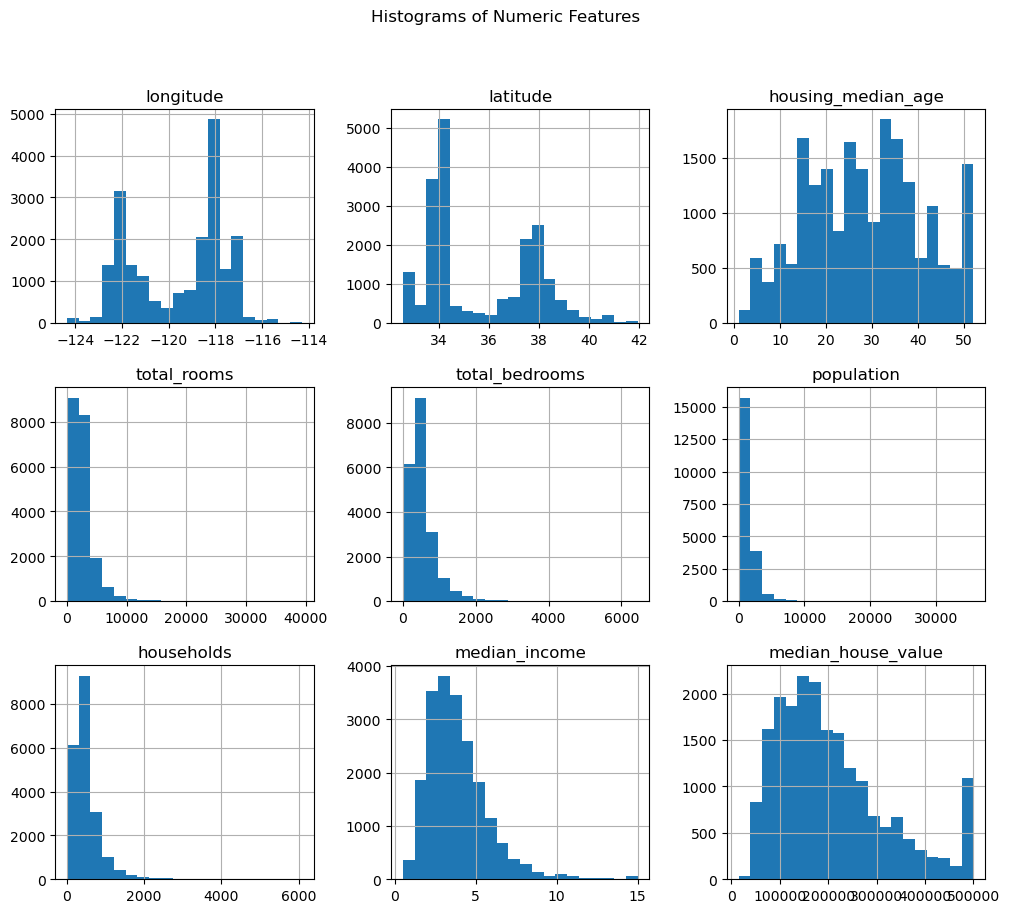

In [66]:
# Histograms for each numeric column
housing.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

**Explanation**:
- This code creates histograms for all numeric features, showing their distributions. It helps identify skewed distributions, outliers, and data ranges.

#### 7. **Exploring Relationships Between Features**

Scatter plots and correlation matrices are useful for investigating relationships between features.

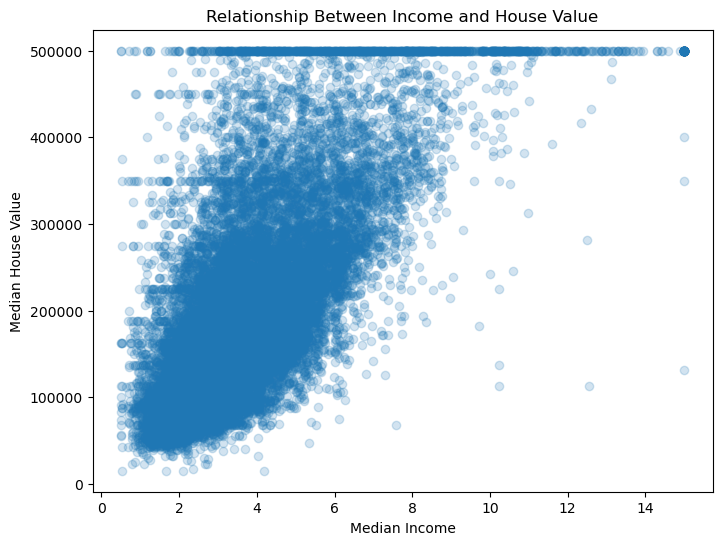

In [67]:
# Scatter plot between median income and median house value
plt.figure(figsize=(8, 6))
plt.scatter(housing['median_income'], housing['median_house_value'], alpha=0.2)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Relationship Between Income and House Value")
plt.show()

**Explanation**:
- A scatter plot between `median_income` and `median_house_value` shows if there’s a correlation. We use `alpha=0.2` to make overlapping points more visible.

#### 8. **Correlation Analysis**

A correlation matrix shows the pairwise correlation between features.

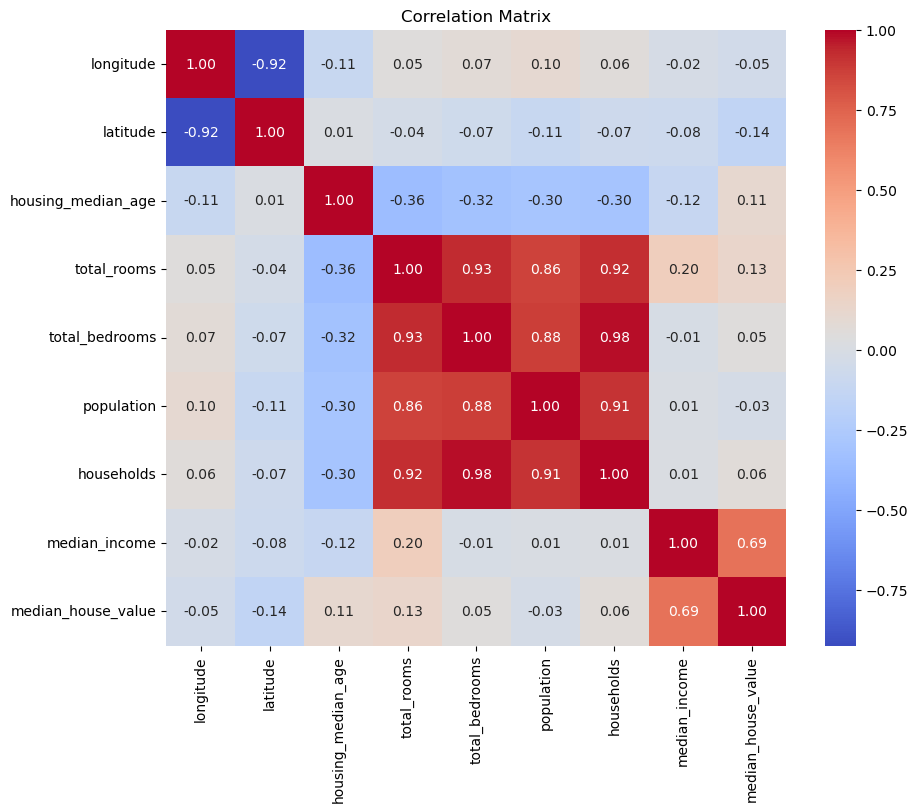

In [69]:
# Select only numeric columns
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = housing_numeric.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Explanation**:
- This heatmap of the correlation matrix helps us identify strong correlations, which can guide feature selection and engineering steps.

#### 9. **Geographic Analysis**

Since this dataset includes longitude and latitude, let’s plot the data geographically.

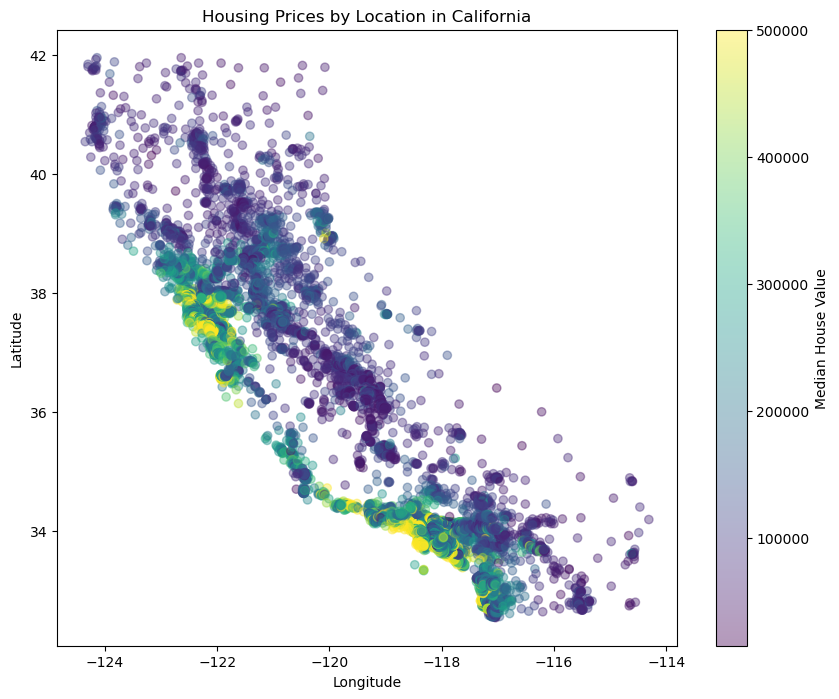

In [70]:
# Scatter plot showing housing values by location
plt.figure(figsize=(10, 8))
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.4,
            c=housing['median_house_value'], cmap='viridis')
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing Prices by Location in California")
plt.show()

**Explanation**:
- This scatter plot shows the geographic distribution of housing prices, using color intensity to represent median house values.

#### 10. **Insights and Next Steps**

After completing the EDA, here are some insights and next steps:
- **Identify Trends**: High `median_income` correlates strongly with `median_house_value`.
- **Feature Engineering**: Create new features (e.g., `rooms_per_household`, `population_per_household`) to capture additional information.
- **Handle Skewed Data**: Log-transform skewed features like `median_house_value` for more normal distributions.
- **Model Selection**: With a better understanding of the data, select appropriate models for predicting `median_house_value`.

### Full Lesson Summary

This EDA lesson covers essential steps for analyzing and preparing data, including:
1. **Data Inspection**: Understanding structure and basic stats.
2. **Handling Missing Values**: Dropping or imputing nulls.
3. **Feature Distributions**: Visualizing with histograms.
4. **Correlation Analysis**: Using heatmaps to find relationships.
5. **Geographic Visualization**: Mapping values by location.

By understanding these steps, students can gain practical insights into data patterns, relationships, and potential transformations needed before model training.